# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] =200
import warnings
warnings.filterwarnings('ignore')

**Read and Get to know your data**

In [2]:
df = pd.read_csv(r"https://raw.githubusercontent.com/priyankamoree/Machine-Learning-Models-/main/Dataset/ToyotaCorolla%20-%20MLR.csv")

In [3]:
df.describe(include='all')

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


In [4]:
df.shape

(1436, 11)

In [5]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [9]:
df['cc'].unique()

array([ 2000,  1800,  1900,  1600,  1400,  1598, 16000,  1995,  1398,
        1300,  1587,  1975,  1332], dtype=int64)

In [10]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [11]:
df['Automatic'].unique()

array([0, 1], dtype=int64)

# **Data Preprocessing: Data Visualization And Transformation**

Text(0.5, 1.0, 'Boxplot For Outlier Detection')

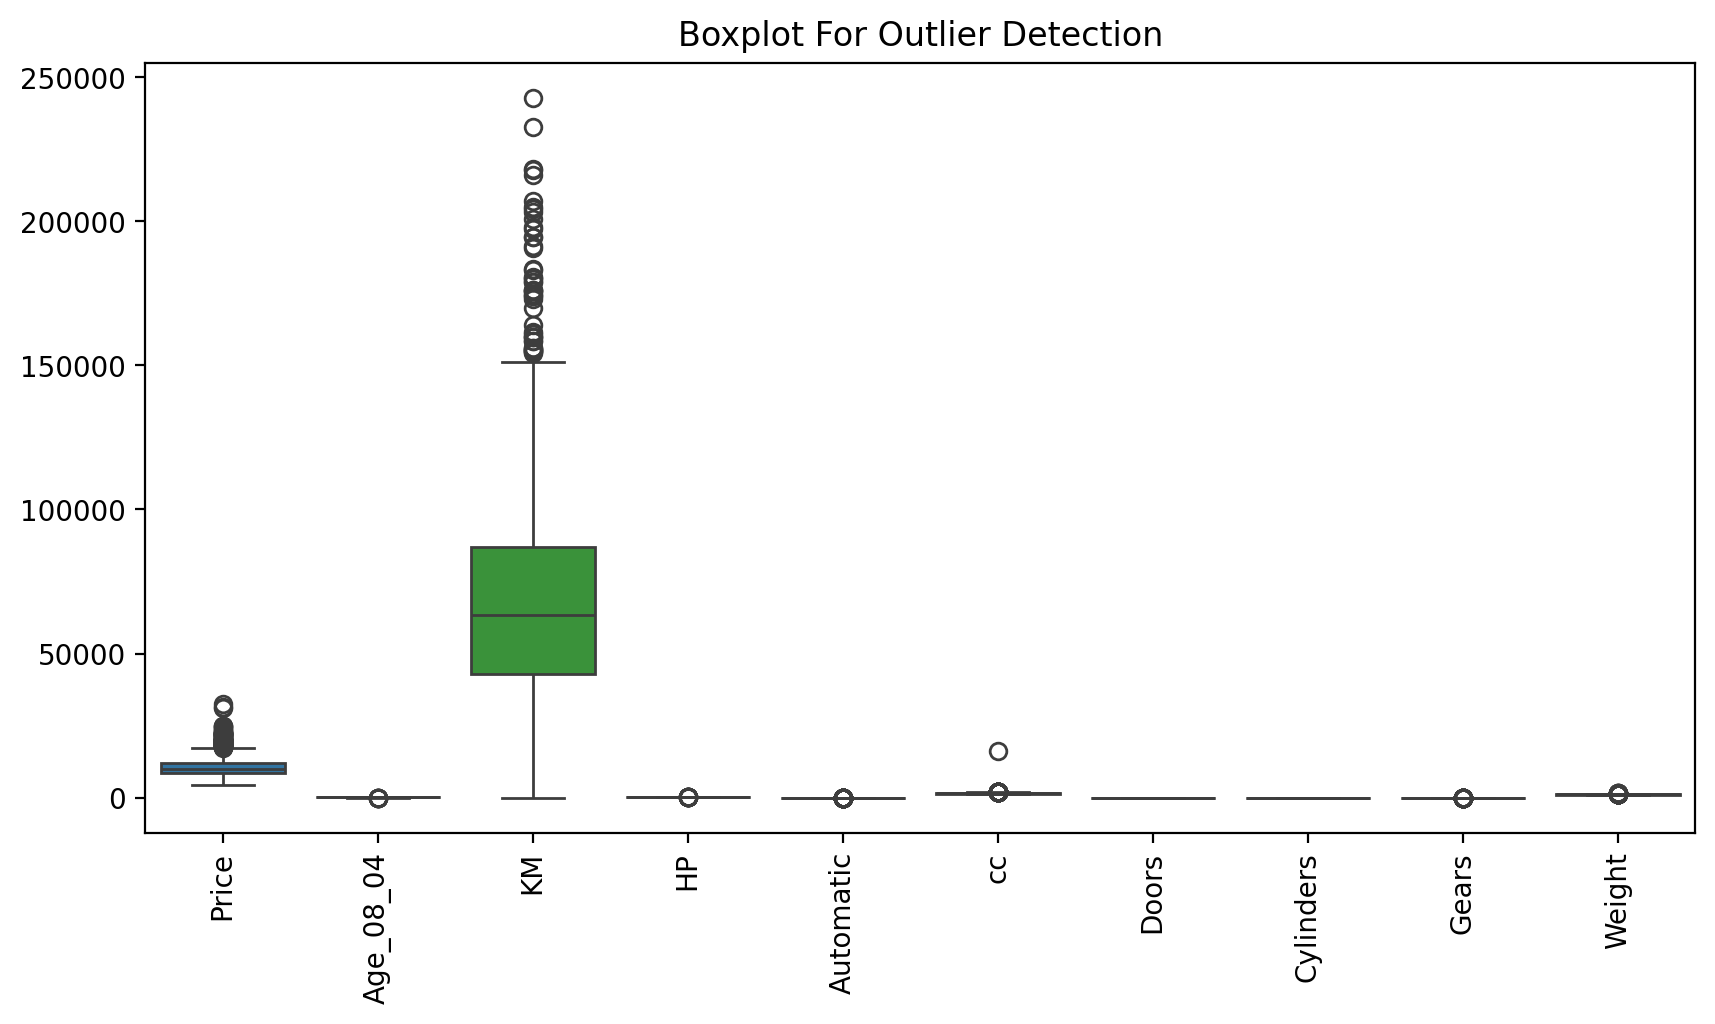

In [12]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Outlier Detection")

In [13]:
df['Gears'].unique().sum()

18

In [14]:
def fit_Outliers(data,cols):
    for col in cols:
        q1= data[col].quantile(0.25)
        q3= data[col].quantile(0.75)
        iqr=q3-q1
        upper = q3+(1.5*iqr)
        lower = q1-(1.5*iqr)
        data[col] = np.where(upper<data[col],upper,np.where(lower>data[col],lower,data[col]))

In [15]:
colum= ['Price','Age_08_04','KM','HP','cc']
fit_Outliers(df,colum)

Text(0.5, 1.0, 'Boxplot For Outlier Detection')

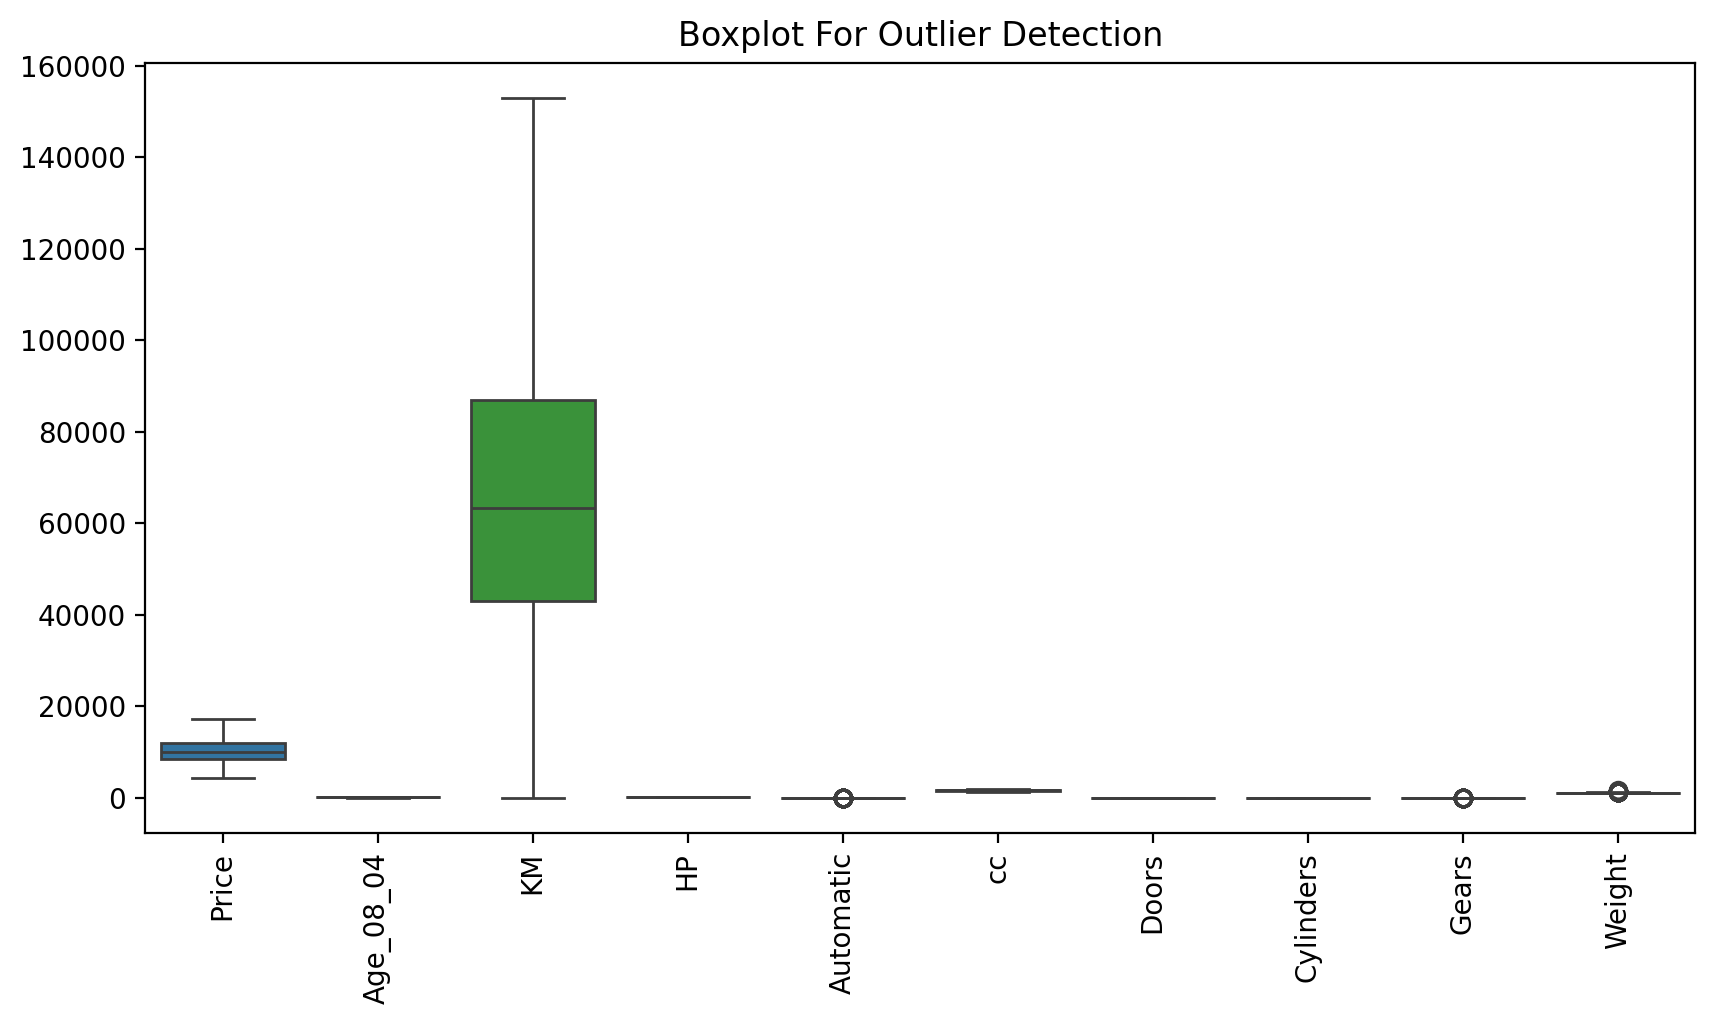

In [16]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot For Outlier Detection")

In [17]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.895728,-0.608832,0.255640,0.035415,0.132106,0.184211,NaN,0.052827,0.493970
Age_08_04,-0.895728,1.000000,0.531839,-0.131284,0.031619,-0.139771,-0.148137,NaN,-0.005463,-0.469940
KM,-0.608832,0.531839,1.000000,-0.330495,-0.081882,0.255855,-0.037677,NaN,0.019974,-0.052024
HP,0.255640,-0.131284,-0.330495,1.000000,0.022339,0.099605,0.120844,NaN,0.140602,0.036249
Automatic,0.035415,0.031619,-0.081882,0.022339,1.000000,-0.059519,-0.027654,NaN,-0.098555,0.057249
cc,0.132106,-0.139771,0.255855,0.099605,-0.059519,1.000000,0.139616,NaN,0.051949,0.631882
Doors,0.184211,-0.148137,-0.037677,0.120844,-0.027654,0.139616,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.052827,-0.005463,0.019974,0.140602,-0.098555,0.051949,-0.160141,NaN,1.000000,0.020613
Weight,0.493970,-0.469940,-0.052024,0.036249,0.057249,0.631882,0.302618,NaN,0.020613,1.000000


<Axes: >

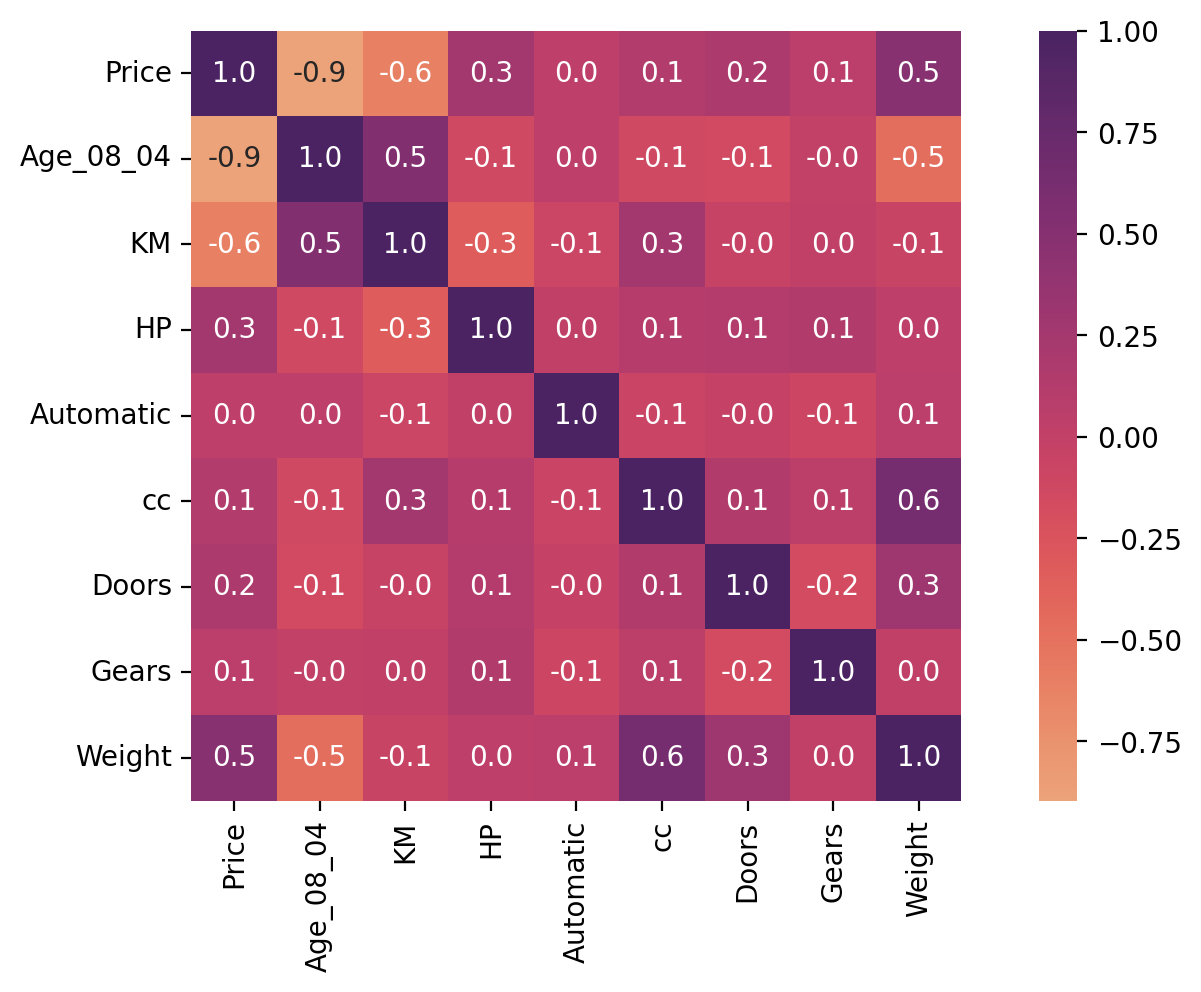

In [18]:
sns.heatmap(df.drop(columns='Cylinders').corr(),cmap='flare',cbar=True,square=True,annot=True,fmt='.1f',center=0)

In [19]:
df=pd.get_dummies(df,columns=['Fuel_Type'])

In [20]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0,1900.0,3,4,5,1165,0,1,0
1,13750.0,23.0,72937.0,90.0,0,1900.0,3,4,5,1165,0,1,0
2,13950.0,24.0,41711.0,90.0,0,1900.0,3,4,5,1165,0,1,0
3,14950.0,26.0,48000.0,90.0,0,1900.0,3,4,5,1165,0,1,0
4,13750.0,30.0,38500.0,90.0,0,1900.0,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0,1300.0,3,4,5,1025,0,0,1
1432,10845.0,72.0,19000.0,86.0,0,1300.0,3,4,5,1015,0,0,1
1433,8500.0,71.0,17016.0,86.0,0,1300.0,3,4,5,1015,0,0,1
1434,7250.0,70.0,16916.0,86.0,0,1300.0,3,4,5,1015,0,0,1


In [21]:
sc = StandardScaler()
Scaled_df = sc.fit_transform(df.loc[:,"Age_08_04":"Fuel_Type_Petrol"])


In [23]:
Scaled_df = pd.DataFrame(Scaled_df,columns=['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'])

- **Split the data For Model Building**

In [24]:
x=Scaled_df
y=df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

# **Model Building Process and evaluation Metrices**

In [25]:
model = LinearRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(f"Accuracy: {r2_score(ypred,ytest)}")
print(f"Mean Absolute Error: {mean_absolute_error(ypred,ytest)}")
print(f"Mean Squared Error: {mean_squared_error(ypred,ytest)}")
print(f"RMSE: {np.sqrt(mean_squared_error(ypred,ytest))}")

Accuracy: 0.8421241261522887
Mean Absolute Error: 899.1719714639406
Mean Squared Error: 1321386.0758380874
RMSE: 1149.5155831210325


# **Coefficients and Intercept**

In [26]:
print(f"Coefficients : {model.coef_}\n Intercept: {model.intercept_}")

Coefficients : [-2.14371197e+03 -5.21911272e+02 -1.72976246e+01  1.08285667e+02
  2.29598277e+02  2.24843096e+01  3.41060513e-13  1.16574062e+02
  5.63097089e+02 -2.22935824e+01 -2.69984701e+02  2.65439179e+02]
 Intercept: 10478.906685032483


In [27]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [28]:
coeffiecients = pd.DataFrame({'Columns' : ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'] ,
                             'Slope' : model.coef_})

In [29]:
coeffiecients

,Columns,Slope
0,Age_08_04,-2.143712e+03
1,KM,-5.219113e+02
2,HP,-1.729762e+01
3,Automatic,1.082857e+02
4,cc,2.295983e+02
5,Doors,2.248431e+01
6,Cylinders,3.410605e-13
7,Gears,1.165741e+02
8,Weight,5.630971e+02
9,Fuel_Type_CNG,-2.229358e+01


# **Lasso Reguralization**

In [30]:
l1 = Lasso()
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain),l1.score(xtest,ytest)

(0.8553039228350479, 0.8612489737050071)

In [31]:
for i in range(1,12):
    l1=Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    print(f" Accuracy at alpha = {i} is {l1.score(xtrain,ytrain)}")

 Accuracy at alpha = 1 is 0.8553039228350479
 Accuracy at alpha = 2 is 0.8552920727321935
 Accuracy at alpha = 3 is 0.8552722465433285
 Accuracy at alpha = 4 is 0.855244290010987
 Accuracy at alpha = 5 is 0.8552081168008135
 Accuracy at alpha = 6 is 0.8551636536559222
 Accuracy at alpha = 7 is 0.8551109434828319
 Accuracy at alpha = 8 is 0.8550496279949873
 Accuracy at alpha = 9 is 0.8550204513996609
 Accuracy at alpha = 10 is 0.854988793155748
 Accuracy at alpha = 11 is 0.8549536789469101


In [32]:
l1.coef_

array([-2134.8755003 ,  -513.10962557,   138.744196  ,   103.19881587,
          57.14372446,    22.29341258,     0.        ,   106.03367902,
         523.74553188,    -0.        ,    -0.        ,   296.51278338])

In [33]:
LassoCoef = pd.DataFrame({'columns' : ['Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
                          'Lasso Coeffiecients': l1.coef_
    
})

In [34]:
LassoCoef

,columns,Lasso Coeffiecients
0,Age_08_04,-2134.875500
1,KM,-513.109626
2,HP,138.744196
3,Automatic,103.198816
4,cc,57.143724
5,Doors,22.293413
6,Cylinders,0.000000
7,Gears,106.033679
8,Weight,523.745532
9,Fuel_Type_CNG,-0.000000


In [35]:
Scaled_df.drop(columns=['Cylinders','Fuel_Type_Petrol'],inplace=True)

In [36]:
model.fit(xtrain,ytrain)
y_pred= model.predict(xtest)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(0.8553077659412166, 0.861274757358966)

In [37]:
print(f"Accuracy: {r2_score(y_pred,ytest)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_pred,ytest)}")
print(f"Mean Squared Error: {mean_squared_error(y_pred,ytest)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_pred,ytest))}")

Accuracy: 0.8421241261522887
Mean Absolute Error: 899.1719714639406
Mean Squared Error: 1321386.0758380874
RMSE: 1149.5155831210325


# **Ridge Regularization**

In [ ]:
l2 = Ridge()
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain),l2.score(xtest,ytest)

In [ ]:
for i in range(1,150):
    l2=Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    print(f"The accuracy when alpha={i} Training accuracy:{l2.score(xtrain,ytrain)} and Testing Accuracy:{l2.score(xtest,ytest)})")

In [ ]:
l2 = Ridge(alpha=59)
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain),l2.score(xtest,ytest)